In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import shap
import numpy as np

In [1]:
data_mean = pd.read_csv(r'C:\Users\Shrinidhi\Desktop\Thesis\fpkm_top_3000_mean_genes.tsv', sep='\t', index_col=0)

X = data_mean.drop(columns=['cancer_status']).values

# Convert 'cancer_status' to binary labels 
y = data_mean['cancer_status'].apply(lambda x: 1 if x == 'cancer' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


NameError: name 'pd' is not defined

In [ ]:
# Initialize the SVM model with an RBF kernel (change to 'linear' if needed)
svm_model = SVC(kernel='linear', probability=True)

In [ ]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.980925006532532
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1921
           1       0.98      0.98      0.98      1906

    accuracy                           0.98      3827
   macro avg       0.98      0.98      0.98      3827
weighted avg       0.98      0.98      0.98      3827

Confusion Matrix:
 [[1890   31]
 [  42 1864]]


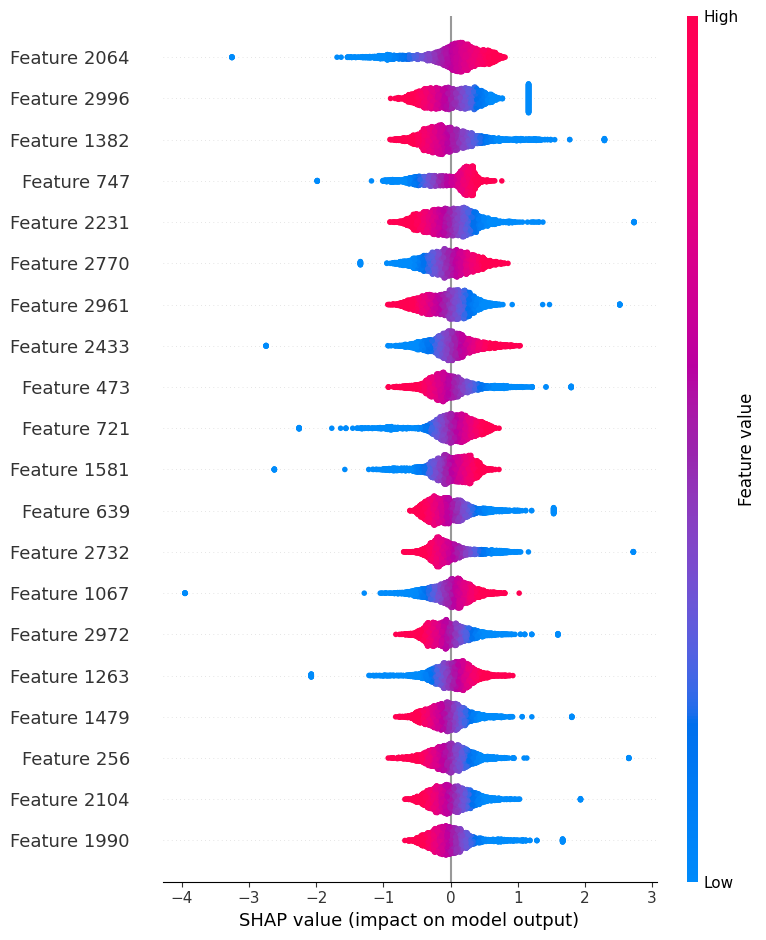

In [ ]:
explainer = shap.LinearExplainer(svm_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


Top 10 most important genes based on SHAP values:
1: ENSG00000142798.16 (Mean Absolute SHAP: 0.3375)
2: ENSG00000211679.2 (Mean Absolute SHAP: 0.3097)
3: ENSG00000173369.15 (Mean Absolute SHAP: 0.2995)
4: ENSG00000167642.12 (Mean Absolute SHAP: 0.2977)
5: ENSG00000168961.16 (Mean Absolute SHAP: 0.2853)
6: ENSG00000118785.13 (Mean Absolute SHAP: 0.2680)
7: ENSG00000184205.14 (Mean Absolute SHAP: 0.2675)
8: ENSG00000021355.12 (Mean Absolute SHAP: 0.2456)
9: ENSG00000125730.16 (Mean Absolute SHAP: 0.2446)
10: ENSG00000142156.14 (Mean Absolute SHAP: 0.2443)


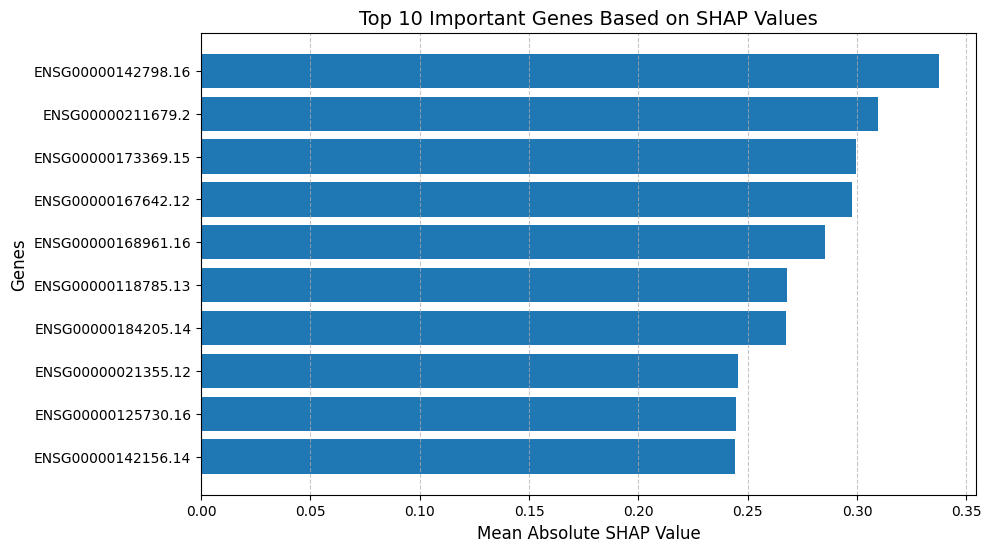

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

feature_names = data_mean.drop(columns=['cancer_status']).columns  # Extract gene names

# Dict values for shap
shap_gene_mapping = {}

# Matching values to gene names
for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values[:, i]

# Mean abs shap vals
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Sort
sorted_genes = np.argsort(mean_abs_shap)[::-1]  # Descending order

# Top 10
top_10_genes = [feature_names[i] for i in sorted_genes[:10]]


print("Top 10 most important genes based on SHAP values:")
for i, gene in enumerate(top_10_genes, 1):
    print(f"{i}: {gene} (Mean Absolute SHAP: {mean_abs_shap[sorted_genes[i-1]]:.4f})")

# Plot 
plt.figure(figsize=(10, 6))
plt.barh(top_10_genes[::-1], mean_abs_shap[sorted_genes[:10]][::-1])  
plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.title('Top 10 Important Genes Based on SHAP Values', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# X_test
feature_names = data_mean.drop(columns=['cancer_status']).columns  

# dict to store shap values and genes
shap_gene_mapping = {}

for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values[:, i]

# Compute the mean absolute SHAP
mean_abs_shap = np.abs(shap_values).mean(axis=0)

#sort
sorted_genes = np.argsort(mean_abs_shap)[::-1]
top_100_genes = [feature_names[i] for i in sorted_genes[:100]]
print("Top 100 most important genes based on SHAP values:")
for i, gene in enumerate(top_100_genes, 1):
    print(f"{i}: {gene} (Mean Absolute SHAP: {mean_abs_shap[sorted_genes[i-1]]:.4f})")

Top 100 most important genes based on SHAP values:
1: ENSG00000142798.16 (Mean Absolute SHAP: 0.3375)
2: ENSG00000211679.2 (Mean Absolute SHAP: 0.3097)
3: ENSG00000173369.15 (Mean Absolute SHAP: 0.2995)
4: ENSG00000167642.12 (Mean Absolute SHAP: 0.2977)
5: ENSG00000168961.16 (Mean Absolute SHAP: 0.2853)
6: ENSG00000118785.13 (Mean Absolute SHAP: 0.2680)
7: ENSG00000184205.14 (Mean Absolute SHAP: 0.2675)
8: ENSG00000021355.12 (Mean Absolute SHAP: 0.2456)
9: ENSG00000125730.16 (Mean Absolute SHAP: 0.2446)
10: ENSG00000142156.14 (Mean Absolute SHAP: 0.2443)
11: ENSG00000130702.13 (Mean Absolute SHAP: 0.2407)
12: ENSG00000011465.16 (Mean Absolute SHAP: 0.2404)
13: ENSG00000196954.12 (Mean Absolute SHAP: 0.2335)
14: ENSG00000062716.10 (Mean Absolute SHAP: 0.2327)
15: ENSG00000165092.12 (Mean Absolute SHAP: 0.2291)
16: ENSG00000011600.11 (Mean Absolute SHAP: 0.2265)
17: ENSG00000240583.10 (Mean Absolute SHAP: 0.2258)
18: ENSG00000125148.6 (Mean Absolute SHAP: 0.2252)
19: ENSG00000175567.8 (M

In [ ]:
top_100_df = pd.DataFrame({
    "Gene": top_100_genes,
    "Mean Absolute SHAP": mean_abs_shap[sorted_genes[:100]]
})

top_100_df.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//SVM//top_100_genes_SHAP_mean.csv", index=False)

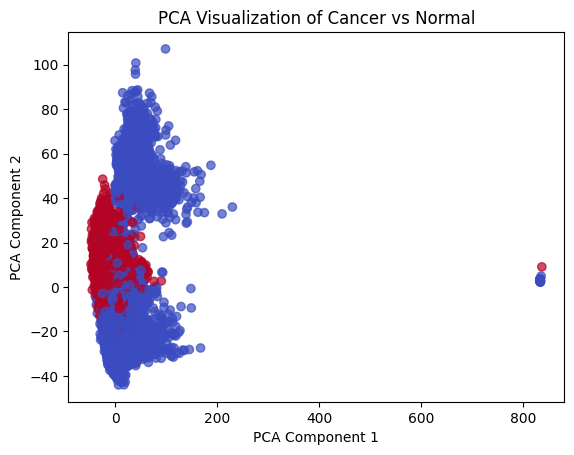

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Cancer vs Normal')
plt.show()


Processing sample 0/3827...
Processing sample 10/3827...
Processing sample 20/3827...
Processing sample 30/3827...
Processing sample 40/3827...
Processing sample 50/3827...
Processing sample 60/3827...
Processing sample 70/3827...
Processing sample 80/3827...
Processing sample 90/3827...
Processing sample 100/3827...
Processing sample 110/3827...
Processing sample 120/3827...
Processing sample 130/3827...
Processing sample 140/3827...
Processing sample 150/3827...
Processing sample 160/3827...
Processing sample 170/3827...
Processing sample 180/3827...
Processing sample 190/3827...
Processing sample 200/3827...
Processing sample 210/3827...
Processing sample 220/3827...
Processing sample 230/3827...
Processing sample 240/3827...
Processing sample 250/3827...
Processing sample 260/3827...
Processing sample 270/3827...
Processing sample 280/3827...
Processing sample 290/3827...
Processing sample 300/3827...
Processing sample 310/3827...
Processing sample 320/3827...
Processing sample 330

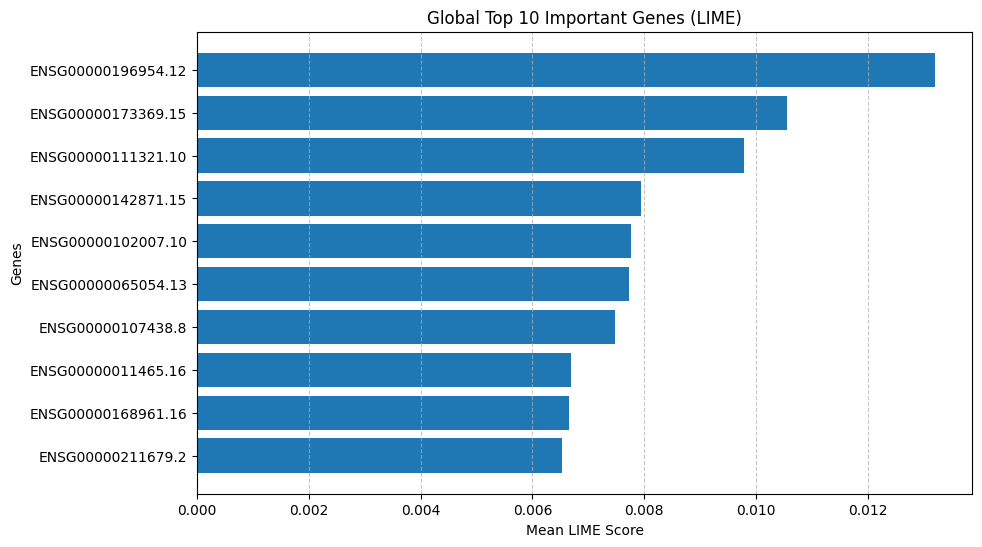

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Feature names
feature_names = data_mean.drop(columns=['cancer_status']).columns.tolist()

# LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, 
    feature_names=feature_names, 
    class_names=['Normal', 'Cancer'], 
    mode='classification'
)

# Dict to store gene names
lime_scores = {gene: [] for gene in feature_names}

num_samples = len(X_test)  

for idx in range(num_samples):  
    sample = X_test[idx].reshape(1, -1)  
    
    # Print progress update
    if idx % 10 == 0:  # Update every 10 samples
        print(f"Processing sample {idx}/{num_samples}...")

    explanation = explainer.explain_instance(sample.flatten(), svm_model.predict_proba, num_features=len(feature_names))  
    
    # Store feature importance values
    for feature, score in explanation.as_list():
        gene = feature.split()[0]  # Extract gene name 
        if gene in lime_scores:  
            lime_scores[gene].append(score)

# Compute mean importance scores 
lime_avg_scores = {gene: np.mean(scores) for gene, scores in lime_scores.items() if scores}  

lime_df = pd.DataFrame(list(lime_avg_scores.items()), columns=["Gene", "Mean LIME Score"])
lime_df = lime_df.sort_values(by="Mean LIME Score", ascending=False)

# Print top 10 most important genes
top_10_genes = lime_df.head(10)
print("\nTop 10 Most Important Genes Based on LIME:")
print(top_10_genes)

# Plot the top 10 global important genes
plt.figure(figsize=(10, 6))
plt.barh(top_10_genes["Gene"][::-1], top_10_genes["Mean LIME Score"][::-1])  
plt.xlabel("Mean LIME Score")
plt.ylabel("Genes")
plt.title("Global Top 10 Important Genes (LIME)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
top_100_genes = lime_df.head(100)
print("\nTop 100 Most Important Genes Based on LIME:")
print(top_100_genes)


Top 100 Most Important Genes Based on LIME:
                    Gene  Mean LIME Score
2732  ENSG00000196954.12         0.013204
1382  ENSG00000173369.15         0.010563
1440  ENSG00000111321.10         0.009778
1990  ENSG00000142871.15         0.007947
742   ENSG00000102007.10         0.007767
...                  ...              ...
2318  ENSG00000111832.12         0.002625
2278  ENSG00000135317.12         0.002622
8      ENSG00000198727.2         0.002619
1488  ENSG00000149115.13         0.002605
1438  ENSG00000197006.13         0.002601

[100 rows x 2 columns]


In [ ]:
top_100_genes.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//SVM//top_100_lime_genes_mean.csv", index=False)